In [1]:
import  matplotlib.pyplot as plt
import numpy as np

In [2]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [3]:
ans = step_function(np.array([1, 2, -2, 3]))
print(ans)

[1 1 0 1]


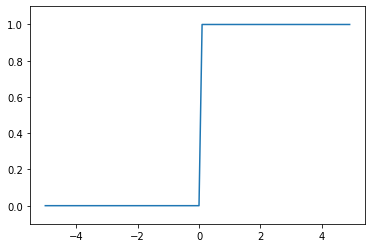

In [4]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

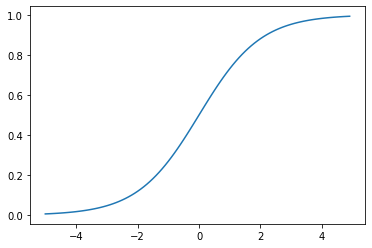

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))  # ブロードキャスト
y = sigmoid(x)
plt.plot(x, y)
plt.show()

In [6]:
x = np.array([-1.0, 1.0, 2.0])

In [9]:
y = sigmoid(x)
print(y)

[0.26894142 0.73105858 0.88079708]


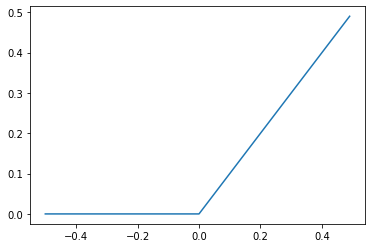

In [13]:
def ReLU(x):  # Rectified Liner Unit
    return np.maximum(0, x)
x = np.arange(-0.5, 0.5, 0.01)
y = ReLU(x)
plt.plot(x, y)
plt.show()

In [15]:
# 簡易なニューラルネットワークの実装
X = np.array([1, 2])
W = np.array([[1, 3, 5], [2, 4, 6]])
Y = np.dot(X, W)
print(Y)

[ 5 11 17]


In [17]:
# 3層ニューラルネットワークのフォワード伝搬
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# 0-1層
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)
print(Z1)

[0.57444252 0.66818777 0.75026011]


In [18]:
# 3層ニューラルネットワークのフォワード伝搬
# 1-2層
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(Z2)

[0.62624937 0.7710107 ]


In [20]:
# 3層ニューラルネットワークのフォワード伝搬
# 2-3層
def identity_function(x):
    return x
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
print(Y)

[0.31682708 0.69627909]


In [28]:
# 3層ニューラルネットワークのフォワード伝搬
# 関数で流れを統合
# ReLU版
def ReLU(x):
    return np.maximum(0, x)

def identity_function(x):
    return x

def network_init():
    network = {}  # オブジェクト宣言
    network["W1"] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network["W2"] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network["W3"] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network["B1"] = np.array([0.1, 0.2, 0.3])
    network["B2"] = np.array([0.1, 0.2])
    network["B3"] = np.array([0.1, 0.2])
    return network

def forward(network, x):
    A1 = np.dot(x, network["W1"]) + network["B1"]
    Z1 = ReLU(A1)
    # Z1 = sigmoid(A1)
    A2 = np.dot(Z1, network["W2"]) + network["B2"]
    Z2 = ReLU(A2)
    # Z2 = sigmoid(A2)
    A3 = np.dot(Z2, network["W3"]) + network["B3"]
    Y = identity_function(A3)
    return Y

x = np.array([1.0, 0.5])
network = network_init()
y = forward(network, x)
print(y)
# ReLU -> 0

[0.426 0.912]
